#### Dataset Link =  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/


#### Hope you enjoy reading the notebook . Sorry for bad code or redundant code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

In [2]:
#read dataset

filepath = "../Documents/Kaggle/red-wine/winequality-red.csv"
df = pd.read_csv(filepath)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Quality')

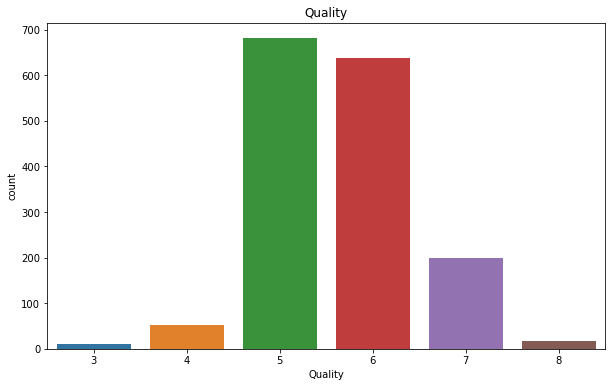

In [7]:
fig= plt.figure(figsize=(10,6))
sns.countplot(df['quality'])
plt.xlabel("Quality")
plt.title("Quality")

In [8]:
df['quality']=["Good" if x>=7 else "Bad" for x in df['quality']]
df['quality'].value_counts()

Bad     1382
Good     217
Name: quality, dtype: int64

Text(0.5, 1.0, 'Percentage of Quality')

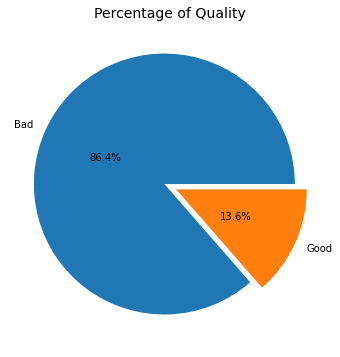

In [9]:
pie, ax = plt.subplots(figsize=[10,6])
# labels = df['quality'].keys()
plt.pie(x=df['quality'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['quality'].unique(), pctdistance=0.5)
plt.title("Percentage of Quality", fontsize=14)

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
X= df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

LE = LabelEncoder()
df['quality'] = LE.fit_transform(df['quality'])
y=df['quality']


In [12]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

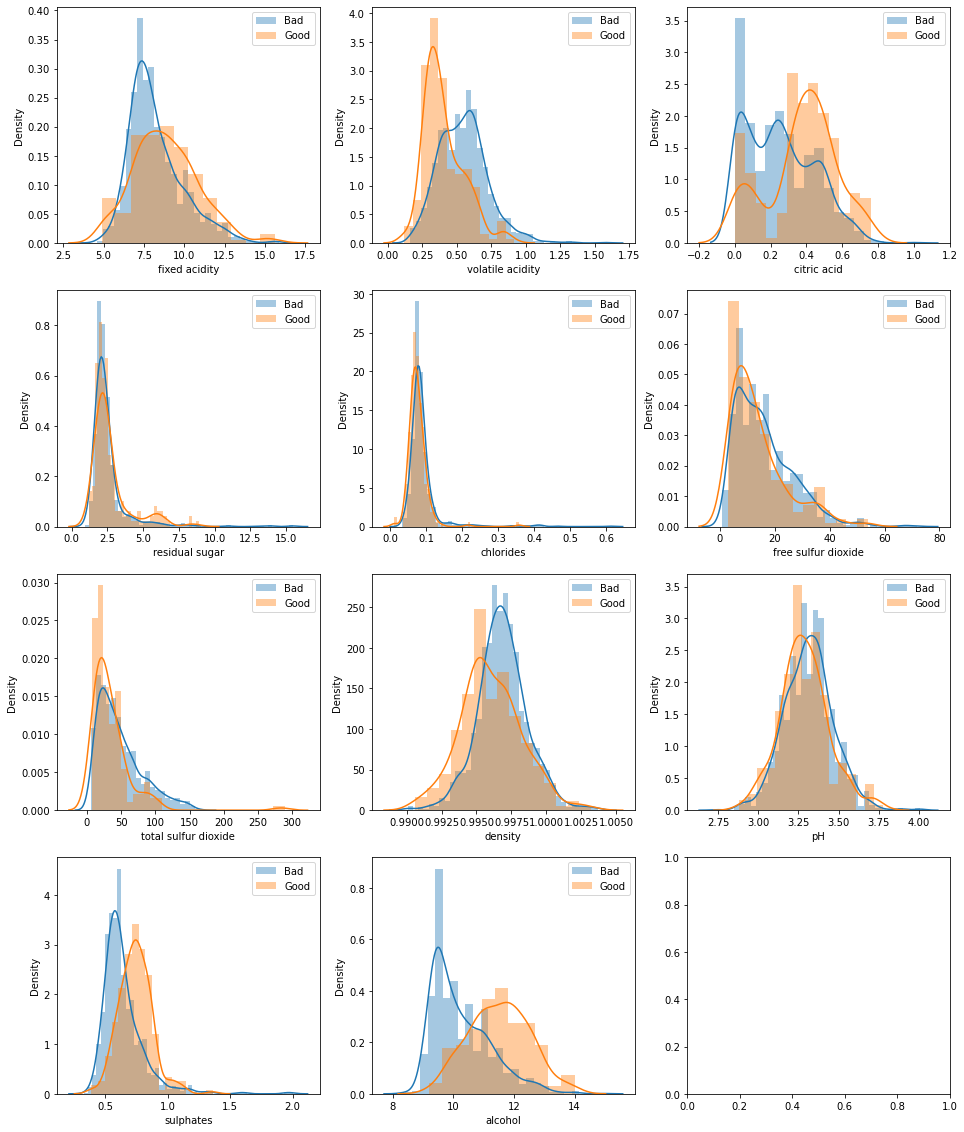

In [14]:
def make_distplot_():
    nrow=4
    ncol=3
    k=0
    cols= X.columns.tolist()
    f,ax = plt.subplots(nrows=nrow,ncols=ncol,figsize=(16,20))
    for i in range(nrow):
        for j in range(ncol):
            
            if k<len(X.columns):
                sns.distplot(df[cols[k]][df['quality']==0],ax=ax[i,j],label='Bad')
                sns.distplot(df[cols[k]][df['quality']==1],ax=ax[i,j],label='Good')
                ax[i,j].legend()
                
                k+=1
            else:
                break
    
    plt.show()
make_distplot_()



NameError: name 'make_barplot' is not defined

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

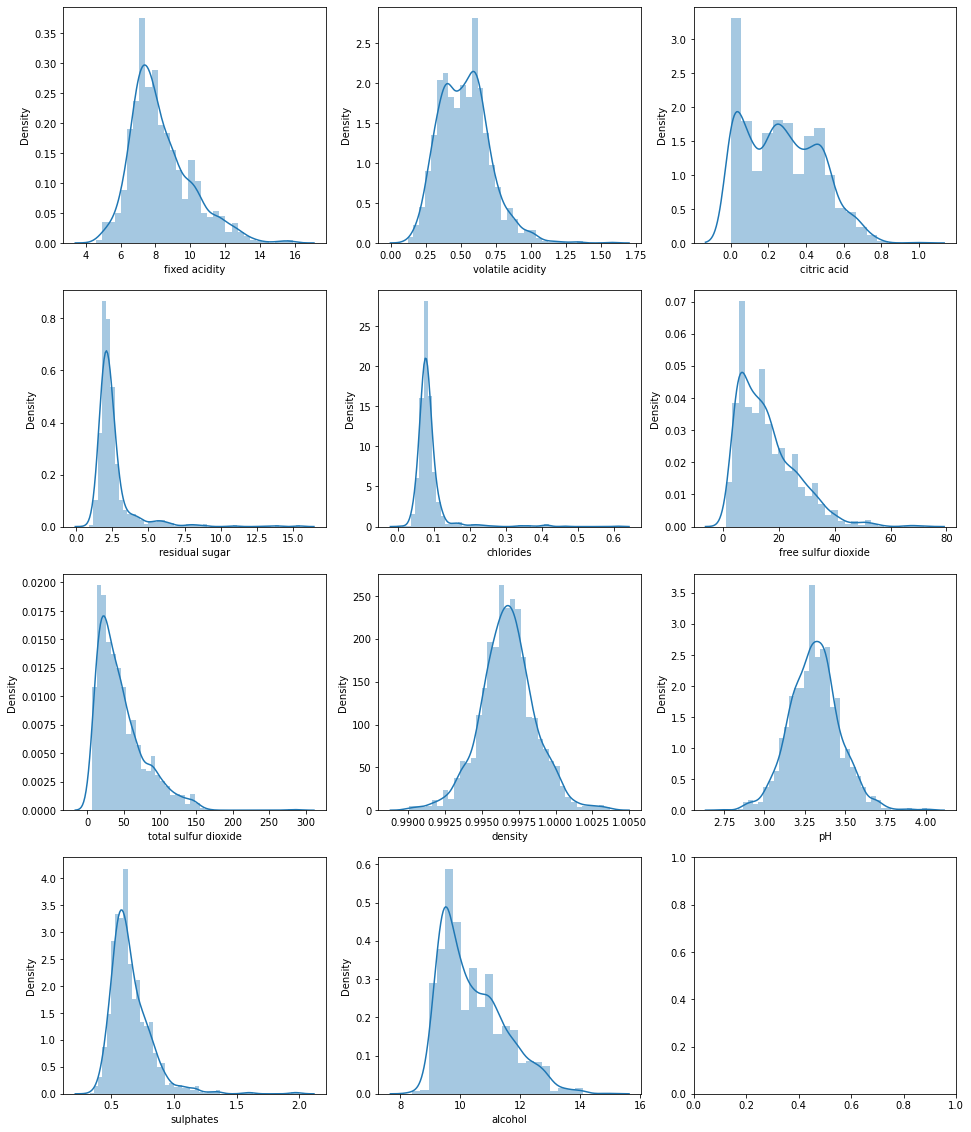

In [16]:
def make_distplot():
    nrow=4
    ncol=3
    k=0
    cols= X.columns.tolist()
    f,ax = plt.subplots(nrows=nrow,ncols=ncol,figsize=(16,20))
    for i in range(nrow):
        for j in range(ncol):
            
            if k<len(X.columns):
                sns.distplot(X[cols[k]],ax=ax[i,j])
                k+=1
            else:
                break
            
    plt.show()
make_distplot()

# f= plt.figure(figsize=(10,6))
# sns.distplot(X['alcohol'])
# plt.show()

#### Split the dataset for training


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)


In [18]:
# Use the standard scaler to get mean=0 and std = 1
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train the dataset. Because the target classes are imbalanced so I use confusion matrix and classification report to get the precission, recall and f1-score

In [19]:
#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)


GaussianNB()

In [20]:
y_pred= nb_model.predict(X_test)


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       408
           1       0.44      0.62      0.52        72

    accuracy                           0.82       480
   macro avg       0.68      0.74      0.71       480
weighted avg       0.86      0.82      0.84       480



In [22]:
accuracy_score(y_test, y_pred)

0.825

In [23]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [24]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       408
           1       0.78      0.49      0.60        72

    accuracy                           0.90       480
   macro avg       0.85      0.73      0.77       480
weighted avg       0.89      0.90      0.89       480



In [25]:
confusion_matrix(y_test,pred_rfc)

array([[398,  10],
       [ 37,  35]], dtype=int64)

In [26]:
#Logistic Regression

logreg = LogisticRegression(n_jobs=None)
logreg.fit(X_train,y_train)
pred_lg = logreg.predict(X_test)
accuracy_score(y_test,pred_lg)

0.8604166666666667

In [27]:
#Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
accuracy_score(pred_svc,y_test)

0.8708333333333333

In [28]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       408
           1       0.71      0.24      0.35        72

    accuracy                           0.87       480
   macro avg       0.79      0.61      0.64       480
weighted avg       0.85      0.87      0.84       480



In [29]:
print(confusion_matrix(y_test,pred_svc))

[[401   7]
 [ 55  17]]


In [30]:
#Do cross val score with training set 
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9016972329472329

In [31]:
#Cross validation and tried using Stratified KFolds

from sklearn.model_selection import cross_validate

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)
          }           
new_eval = cross_validate(estimator=rfc,X=X_train,y=y_train,cv=10,scoring=scoring)

In [32]:
new_eval

{'fit_time': array([0.41489434, 0.39236045, 0.38710117, 0.39308882, 0.40811515,
        0.39007425, 0.38953972, 0.40108275, 0.39510274, 0.3710835 ]),
 'score_time': array([0.01700187, 0.01599598, 0.01700377, 0.01699042, 0.01600409,
        0.01600289, 0.01801157, 0.01700425, 0.01610351, 0.01799417]),
 'test_accuracy': array([0.91071429, 0.90178571, 0.91071429, 0.88392857, 0.89285714,
        0.88392857, 0.91071429, 0.95535714, 0.86607143, 0.9009009 ]),
 'test_precision': array([0.83333333, 0.71428571, 1.        , 0.6       , 0.66666667,
        0.625     , 0.77777778, 1.        , 0.5       , 0.71428571]),
 'test_recall': array([0.35714286, 0.35714286, 0.28571429, 0.21428571, 0.4       ,
        0.33333333, 0.46666667, 0.66666667, 0.46666667, 0.35714286]),
 'test_f1_score': array([0.5       , 0.47619048, 0.44444444, 0.31578947, 0.5       ,
        0.43478261, 0.58333333, 0.8       , 0.48275862, 0.47619048])}

In [33]:
new_eval['test_precision'].mean()

0.7431349206349206

In [34]:
new_eval['test_f1_score'].mean()

0.5013489433228248

In [35]:
new_eval['test_recall'].mean()

0.39047619047619053

In [36]:
#Tried using whole dataset with KFold

X_copy = X.copy()
y_copy = y.copy()

X_copy= sc.fit_transform(X_copy)


In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold

# evaluate the model 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_validate(rfc, X_copy, y_copy, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')



In [38]:
n_scores

{'fit_time': array([0.50963759, 0.51664257, 0.50463915, 0.52164292, 0.53264952,
        0.5336504 , 0.53565073, 0.51964664, 0.49111176, 0.49911213,
        0.50110912, 0.49962163, 0.51562095, 0.52862525, 0.52862597,
        0.52111578, 0.54467201, 0.5401926 , 0.56019545, 0.56519866,
        0.60316896, 0.58765483, 0.59068561, 0.64372182, 0.66577458,
        0.67372799, 0.68071318, 0.64067006, 0.50764656, 0.50567198]),
 'score_time': array([0.01900625, 0.01700497, 0.01900434, 0.01700425, 0.02000642,
        0.01900673, 0.01900387, 0.01800513, 0.02200437, 0.01700497,
        0.01800561, 0.02400255, 0.02100563, 0.01900315, 0.0180037 ,
        0.02500582, 0.01800609, 0.02100444, 0.02300549, 0.01800489,
        0.01900315, 0.01903534, 0.02703023, 0.0250392 , 0.02400732,
        0.02300596, 0.01900434, 0.01700354, 0.0190053 , 0.01951623]),
 'test_accuracy': array([0.90625   , 0.9125    , 0.9375    , 0.90625   , 0.95      ,
        0.90625   , 0.9       , 0.91875   , 0.88125   , 0.90566038,
 

In [39]:
n_scores['test_accuracy'].mean()

0.9143225890985324

In [40]:
n_scores['test_precision'].mean()

0.7683489953458995

In [41]:
n_scores['test_recall'].mean()

0.5281385281385281

In [42]:
n_scores['test_f1_score'].mean()

0.621103699128316

In [43]:
#Try to tune the RFC, note : This one may took a while.
# Number of trees in random forest
n_estimators = [200,250,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [2,3,5]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 250, 300], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 3, 5, None], 'bootstrap': [True, False]}


In [44]:
rfc_2= RandomForestClassifier(random_state=5)
grid_rfc = GridSearchCV(rfc_2,param_grid=random_grid,cv=cv,n_jobs=-1)
grid_rfc.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestClassifier(random_state=5), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 5, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 250, 300]})

In [45]:
grid_rfc.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 250}

In [46]:
grid_rfc.best_score_ 

0.9008124195624195

In [47]:
from sklearn.metrics import precision_score

pred_rfc_tune = grid_rfc.predict(X_test)
precision_score(y_test, pred_rfc_tune)


0.7608695652173914